In [1]:
#importing important files and necessary functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [2]:
#importing the dataset
dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
#finding more information on each column
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
#fetch the car name
dataset['name']=dataset['name'].str.split(' ').str.slice(0,1).str.join(' ')

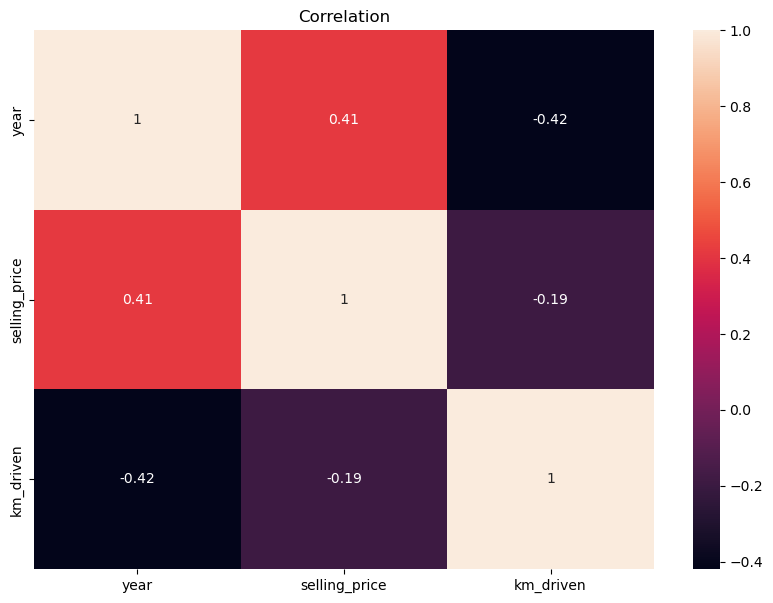

In [5]:
#Non-Categorical values' correlation graph
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(), annot=True)
plt.title('Correlation')
plt.show()

In [6]:
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
dataset[dataset['km_driven']>3e5]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,Chevrolet,2010,280000,350000,Diesel,Individual,Manual,Second Owner
525,Maruti,2016,665000,560000,Diesel,Dealer,Manual,First Owner
1243,Maruti,2009,250000,806599,Petrol,Dealer,Manual,First Owner
1674,Volkswagen,2011,350000,312000,Diesel,Individual,Manual,Third Owner
2394,Toyota,2009,350000,350000,Diesel,Individual,Manual,First Owner
3679,Toyota,2006,400000,400000,Diesel,Individual,Manual,Third Owner
3718,Toyota,2009,420000,347089,Diesel,Dealer,Manual,First Owner
4184,Maruti,2016,665000,560000,Diesel,Dealer,Manual,First Owner


In [8]:
dataset=dataset[dataset['km_driven']<3e5].reset_index(drop=True)
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4322,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4323,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4324,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4325,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [9]:
dataset=dataset[dataset['selling_price']<6e6].reset_index(drop=True)

In [10]:
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4320,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4321,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4322,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4323,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [11]:
dataset.describe()


,year,selling_price,km_driven
count,4325.000000,4.325000e+03,4325.000000
mean,2013.099884,5.009879e+05,65241.915838
std,4.213729,5.530250e+05,42223.348231
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.049990e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,5.500000e+06,296823.000000


In [12]:
y=dataset['selling_price']

In [13]:
X=dataset[['year','km_driven','fuel','seller_type','transmission','owner']]


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#creating dummies

In [16]:
fuel = dataset['fuel']
fuel = pd.get_dummies(fuel)
fuel

,CNG,Diesel,Electric,LPG,Petrol
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
4320,0,1,0,0,0
4321,0,1,0,0,0
4322,0,0,0,0,1
4323,0,1,0,0,0


In [17]:
gears = dataset['transmission']
gears=pd.get_dummies(gears)
gears

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4320,0,1
4321,0,1
4322,0,1
4323,0,1


In [18]:
owners=dataset['owner']
owners=pd.get_dummies(owners)
owners

,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
4320,0,0,1,0,0
4321,0,0,1,0,0
4322,0,0,1,0,0
4323,1,0,0,0,0


In [19]:
seller=dataset['seller_type']
sellers=pd.get_dummies(seller)
sellers

,Dealer,Individual,Trustmark Dealer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
4320,0,1,0
4321,0,1,0
4322,0,1,0
4323,0,1,0


In [20]:
company=dataset['name']
companies=pd.get_dummies(company)
companies

,Ambassador,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,...,Mercedes-Benz,Mitsubishi,Nissan,OpelCorsa,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#year and Km_driven
year=dataset['year']
km_driven=dataset['km_driven']
year

0       2007
1       2007
2       2012
3       2017
4       2014
        ... 
4320    2014
4321    2014
4322    2009
4323    2016
4324    2016
Name: year, Length: 4325, dtype: int64

In [22]:
#concatenation
X = pd.concat([companies,fuel,sellers,gears,owners,year,km_driven] ,  axis=1)

In [23]:
X

,Ambassador,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,...,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,year,km_driven
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2007,70000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2007,50000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2012,100000
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,2017,46000
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,2014,141000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,2014,80000
4321,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,2014,80000
4322,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,2009,83000
4323,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2016,90000


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=849)

In [26]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [28]:
X_train

,Ambassador,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,...,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,year,km_driven
1806,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,2007,101849
2234,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,2012,110000
2258,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2016,41000
735,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2019,25000
1664,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2012,60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2016,60000
3607,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,2018,13000
1829,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,2019,30000
3645,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2012,110000


In [29]:
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.fit_transform(X_test)

In [30]:
model=LinearRegression()

In [31]:
model.fit(X_train,y_train) 

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
score=model.score(X_test,y_test)
score

0.7722667641156522

In [34]:
#controlling coefficients
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])
coeff_df

,coefficient
Ambassador,1.418808e+13
Audi,1.418808e+13
BMW,1.418808e+13
Chevrolet,1.418808e+13
Daewoo,1.418808e+13
Datsun,1.418808e+13
Fiat,1.418808e+13
Force,1.418808e+13
Ford,1.418808e+13
Honda,1.418808e+13


In [35]:

my_car = [X.iloc[0].to_numpy()]

best_price=(model.predict(my_car))
print(best_price)
print(my_car)

[51808.47070312]
[array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           1,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,     0,     1,
           0,     0,     1,     1,     0,     0,     0,     0,  2007,
       70000])]


/Users/shaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


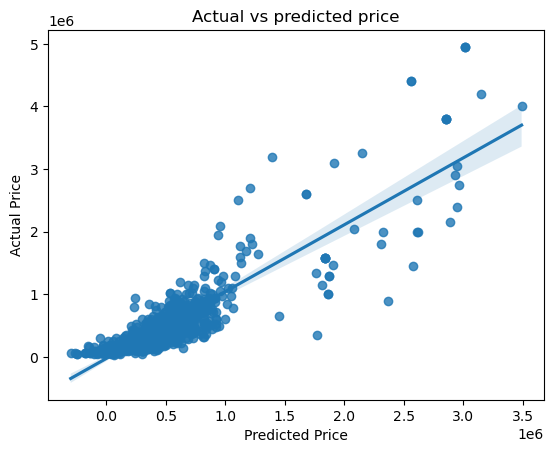

In [36]:
#plot of the prediction efficiency
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

In [37]:
## one hot encoding for front end pickle file generation
ohe=OneHotEncoder()
X_=dataset.drop(columns='selling_price')
y=dataset['selling_price']
ohe.fit(X_[['name','fuel','seller_type','transmission','owner']])
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.20, random_state=849)

In [38]:
column_trans= make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','transmission','owner']),remainder='passthrough')

In [39]:
column_trans.fit(X_[['name','fuel','seller_type','transmission','owner','year','km_driven']])

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'V...gen', 'Volvo'], dtype=object),
                                                           array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
                                                           array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
                                                           array(['Automatic', 'Manual'], dtype=object),
                                                           array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)]),
                                 ['name', 'fuel', 'seller_type', 'transmission',
                                  'owner'])])

In [40]:
#pickle file generation
import pickle

In [41]:
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(column_trans,open('trans.pkl','wb'))

In [42]:
dataset.to_csv('orderedcarset2.csv')

In [43]:
trans=column_trans.transform(pd.DataFrame([['Maruti','Petrol','Individual','Manual','First Owner',2007,70000]],columns=['name', 'fuel','seller_type','transmission','owner','year','km_driven']))

In [44]:
trans.toarray()

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.007e+03, 7.000e+04]])

In [45]:
model.predict(trans)

/Users/shaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51808.47070312])

In [46]:
model.predict(my_car)

array([51808.47070312])